In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MultiLabelBinarizer
import math  

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact


from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nimma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nimma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nimma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv(r"../data/cosmetic_preprocess.csv");

In [6]:
df.head(10)

,Label,Name,brand,price,rank,ingredients,Combination,Dry,Mature,Normal,Oil,Sensitive
0,moisturizer,The Dewy Skin Cream Plumping & Hydrating Moist...,Tatcha,69,4.0,"Aqua/Water/Eau, Saccharomyces/Camellia Sinensi...",0,1,0,1,0,0
1,moisturizer,Revealer Skin-Improving Foundation SPF25 with ...,Kosas,42,4.0,"Zinc Oxide (7.5%), Water, Ethylhexyl Olivate, ...",1,1,0,1,1,0
2,moisturizer,Plum Plump Hyaluronic Acid Moisturizer,Glow Recipe,39,4.5,"Water/Aqua/Eau, Propanediol, Glycerin, C13-15 ...",1,1,0,1,1,0
3,moisturizer,The Water Cream Oil-Free Pore Minimizing Moist...,Tatcha,69,4.0,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,1,0,1,1,0
4,moisturizer,Barrier+ Triple Lipid-Peptide Face Cream,Skinfix,52,4.5,"Water/Eau/Aqua, Caprylic/Capric Triglyceride, ...",0,1,0,1,1,0
5,moisturizer,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,64,4.5,"Water, Cyclopentasiloxane, Bis-Diglyceryl Poly...",1,0,0,1,1,0
6,moisturizer,Ultra Repair® Cream Intense Hydration,First Aid Beauty,38,4.5,"Colloidal Oatmeal 0.50%, Water, Stearic Acid, ...",1,1,0,1,0,0
7,moisturizer,CC+ Nude Glow Lightweight Foundation + Glow Se...,IT Cosmetics,42,4.5,"Aqua / Water / Eau, Glycerin, Homosalate, Octo...",1,1,0,1,0,0
8,moisturizer,Turn Up the Base Beauty Blur Balm Hybrid Found...,ONE/SIZE by Patrick Starrr,33,4.5,"Water (Aqua/Eau), Caprylyl Methicone, Syntheti...",1,1,0,1,1,0
9,moisturizer,Cicapair™ Tiger Grass Color Correcting Treatme...,Dr. Jart+,52,4.0,"Water, Centella asiatica Leaf Water, Isononyl ...",1,1,0,1,1,0


<AxesSubplot:xlabel='rank', ylabel='price'>

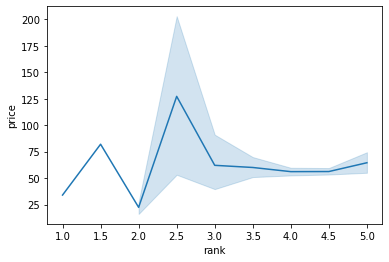

In [7]:
sns.lineplot(data=df, x="rank", y="price")

<AxesSubplot:xlabel='price'>

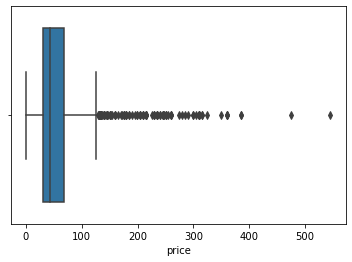

In [8]:
sns.boxplot(data=df,x='price', width=.8)

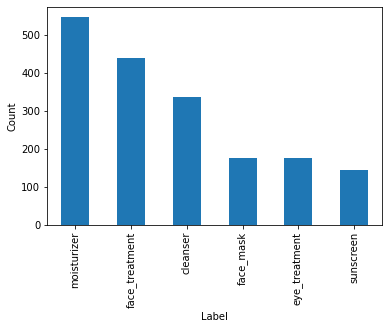

In [16]:

data = df['Label'].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Analysis between Label and Skin type

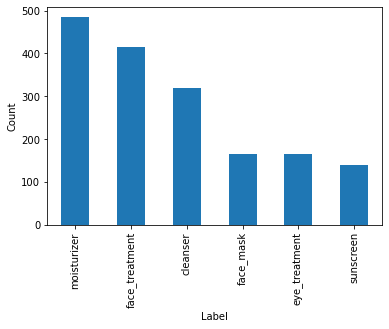

In [17]:
data = df['Label'][df['Combination']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

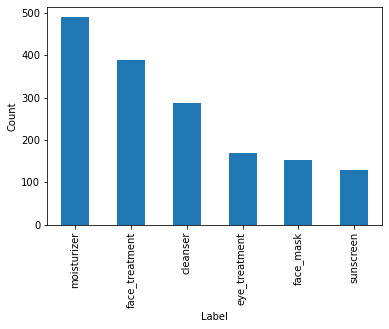

In [18]:
data = df['Label'][df['Dry']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

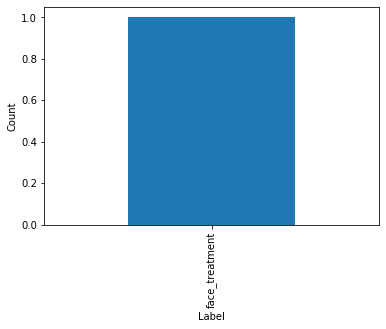

In [19]:
data = df['Label'][df['Mature']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

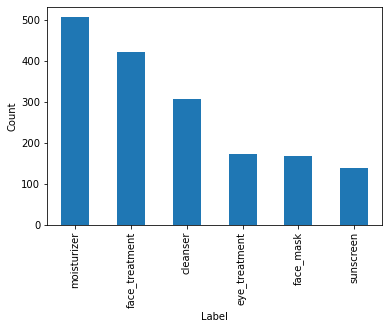

In [20]:
data = df['Label'][df['Normal']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

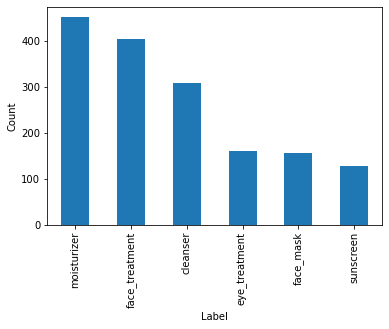

In [21]:
data = df['Label'][df['Oil']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

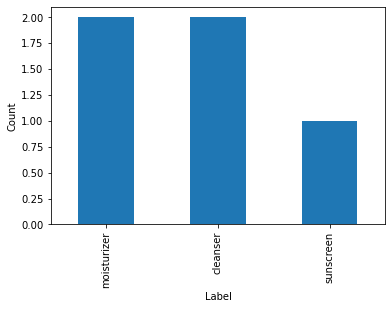

In [22]:
data = df['Label'][df['Sensitive']==1].value_counts()
type(data)
data.plot.bar()
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# NLP: wordclouds and classification

In [23]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [25]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [26]:
moist_df = df[df.Name == 'Moisturizer']
cleanse_df = df[df.Name == 'Cleanser']
mask_df = df[df.Name == 'Face Mask']
treat_df = df[df.Name == 'Treatment']

In [27]:
moist = " ".join(ing for ing in moist_df.Name)
cleanse = " ".join(ing for ing in cleanse_df.ingredients)
mask = " ".join(ing for ing in mask_df.ingredients)
treat = " ".join(ing for ing in treat_df.ingredients)

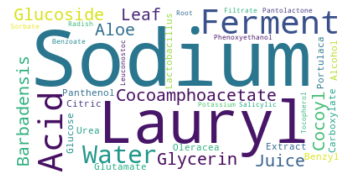

In [29]:
generate_wordcloud(cleanse)

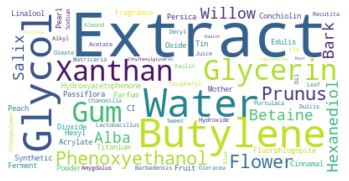

In [30]:
generate_wordcloud(mask)